<a href="https://colab.research.google.com/github/armanalam6342/Face-Emotion-Recognition/blob/main/face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Project Introduction
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


#Problem Statements
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.


# Data Description

The data comes from the past Kaggle challenge "Challenges in Representation Learning: Facial Expression Recognition Challenge":

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The dataset contains approximately 36K images.
we have 7 categories.



    train
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

    validation
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.



# Download Data from Kaggle

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"armanalam6342","key":"14dfac88b5e47026cb9af1760e2114b0"}'}

In [4]:
# creating Directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download dataset
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 87% 105M/121M [00:02<00:00, 36.8MB/s] 
100% 121M/121M [00:03<00:00, 41.0MB/s]


In [6]:
# Extract images from zip file
!unzip "/content/face-expression-recognition-dataset.zip" -d "/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/8797.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/8818.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/886.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/9037.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/9040.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/9101.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/911.jpg  
  inflating: /content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation/fear/9179.jpg  
  inflating: /c

#<b> Import Libraries

In [7]:
# Importing all the required Libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,GlobalMaxPool2D,Activation,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np 
import pandas as pd
import cv2
import os
from sklearn.metrics import confusion_matrix
import itertools
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


#<b> Data exploration

In [8]:
# Defining train and validation path
train_path = '/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/train'
val_path = '/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/images/validation'

In [9]:
# data categories
categories = os.listdir(train_path)
print(categories)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


So, we have 7 diffrent categories

##<b> Count of images in each category

In [10]:
# Training images
total_train_images = 0
for dir_ in os.listdir(train_path):
    count = 0
    for f in os.listdir(train_path+'/' + dir_+"/"):
        count += 1
        total_train_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal train images are {total_train_images}")

angry has 3993 number of images
disgust has 436 number of images
fear has 4103 number of images
happy has 7164 number of images
neutral has 4982 number of images
sad has 4938 number of images
surprise has 3205 number of images

total train images are 28821


In [11]:
# Validation Images
total_validation_images = 0
for dir_ in os.listdir(val_path):
    count = 0
    for f in os.listdir(val_path+'/' + dir_+"/"):
        count += 1
        total_validation_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal validation images are {total_validation_images}")

angry has 960 number of images
disgust has 111 number of images
fear has 1018 number of images
happy has 1825 number of images
neutral has 1216 number of images
sad has 1139 number of images
surprise has 797 number of images

total validation images are 7066


The image expressions in our training dataset are pretty balanced, except for the 'disgust' category.

##<b>Showing some images from training set

In [12]:
# Creating a function for using for show some images from each categories
def imageshow(category):
  plt.figure(figsize= (8,8))
  for i in range(1, 10, 1):
      plt.subplot(3,3,i)
      img = load_img(train_path+'/'+category+"/"+
                    os.listdir(train_path + "/" + category)[i], target_size=(48,48))
      plt.imshow(img)
  plt.suptitle(category,fontsize=30)   
  plt.show()

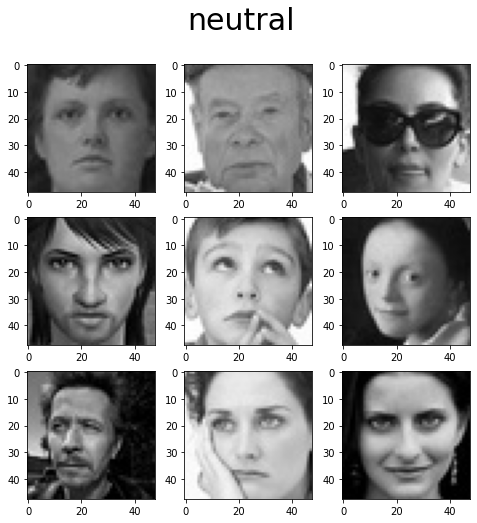

In [13]:
#Showing some images from category neutral
imageshow('neutral')

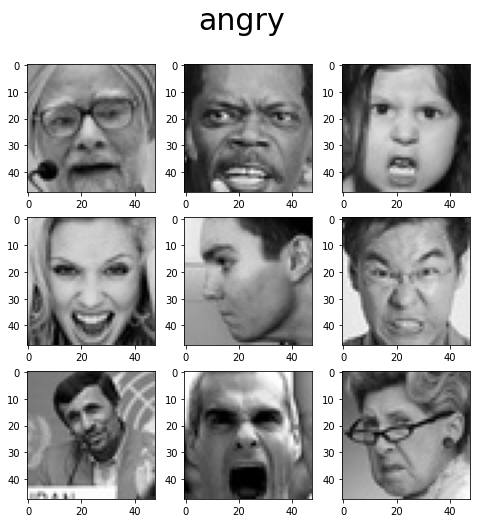

In [14]:
#Showing some images from category angry
imageshow('angry')

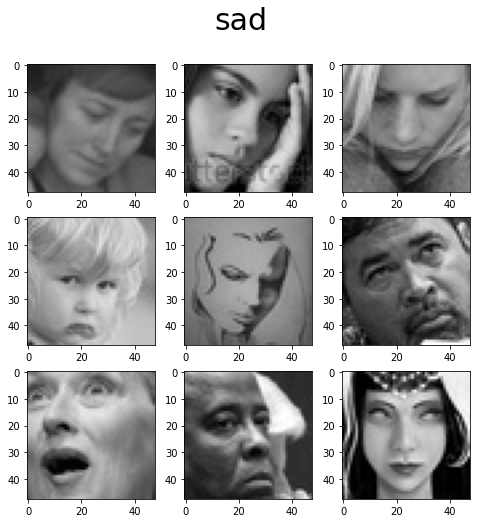

In [15]:
#Showing some images from category sad
imageshow('sad')

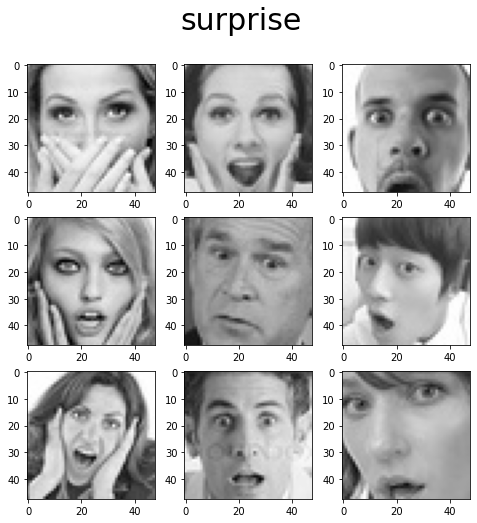

In [17]:
#Showing some images from category surprise
imageshow('surprise')

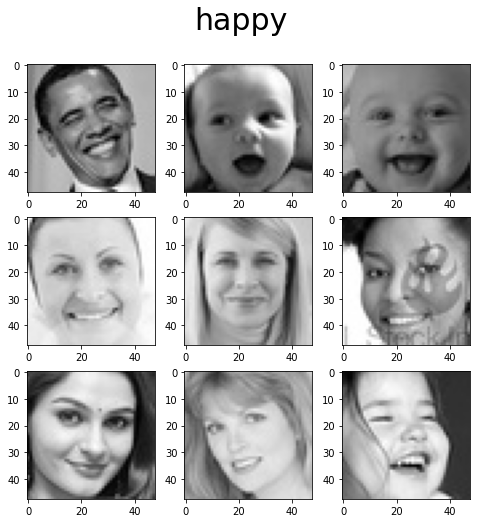

In [18]:
#Showing some images from category happy
imageshow('happy')

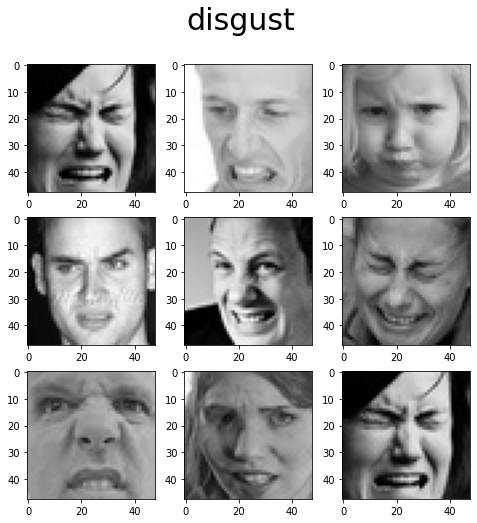

In [19]:
#Showing some images from category disgust
imageshow('disgust')

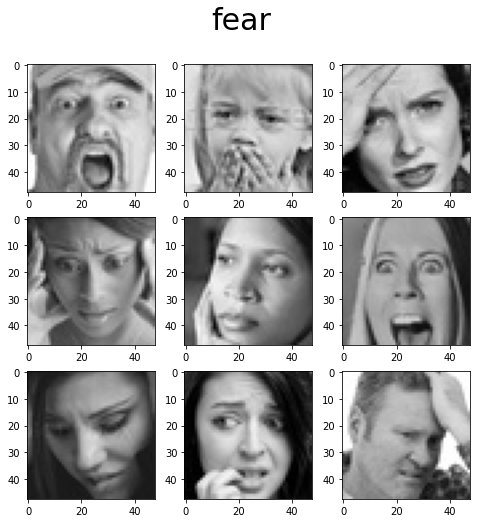

In [20]:
#Showing some images from category fear
imageshow('fear')

##<b> Showing some images from validation set

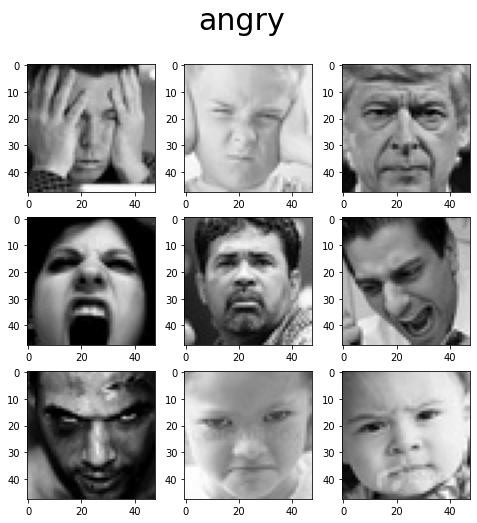

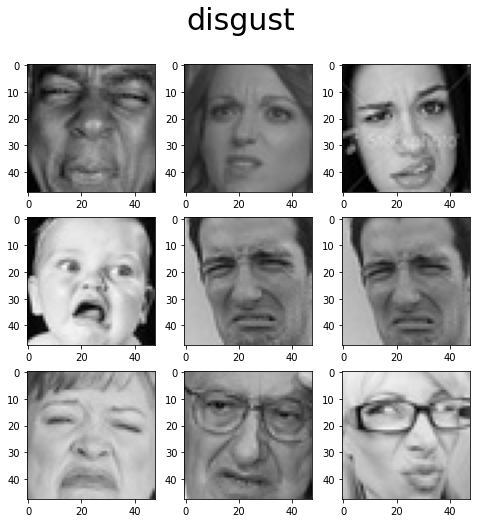

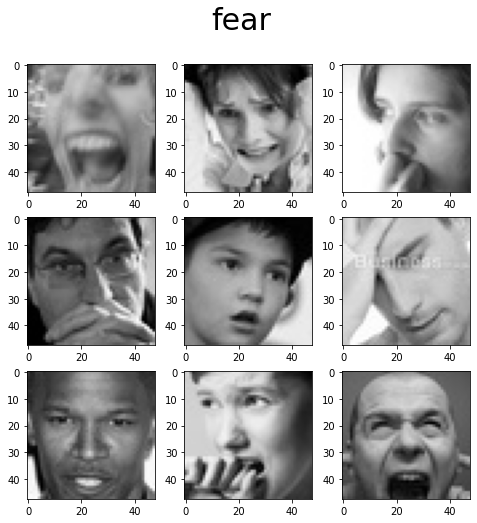

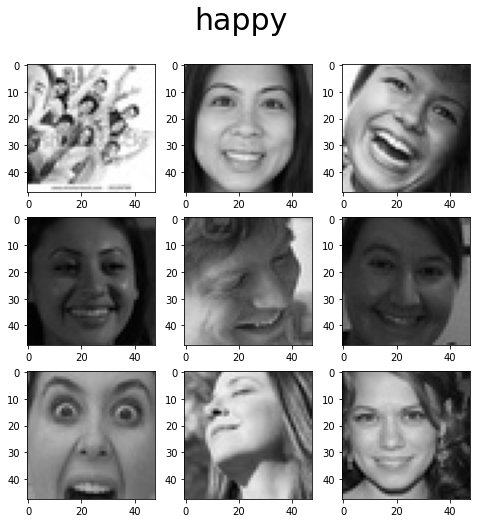

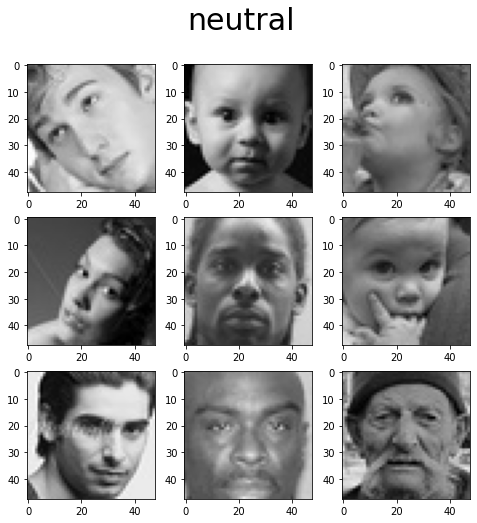

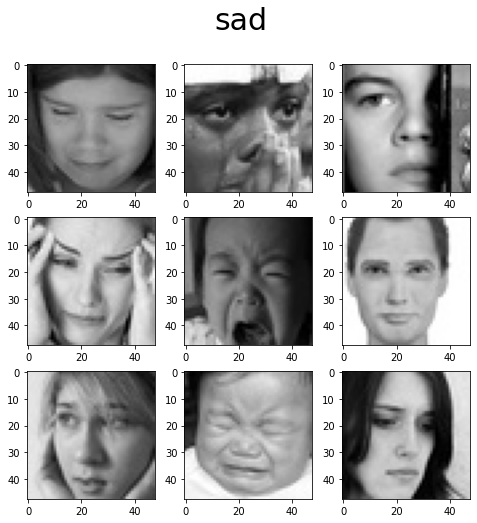

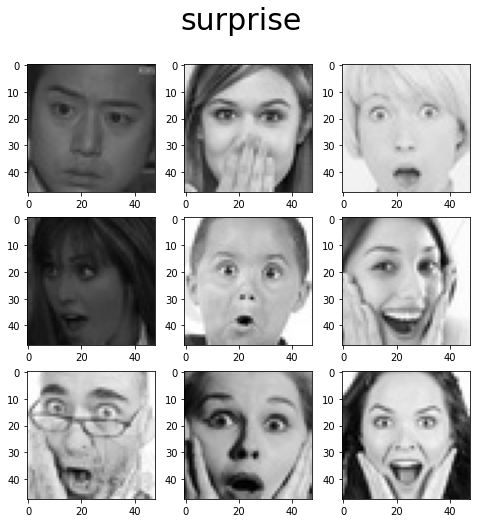

In [21]:
# validation set images
for category in categories:
    plt.figure(figsize= (8,8))
    for j in range(1,10,1):
        
        plt.subplot(3,3,j)
        
        img = load_img(val_path+'/'+category+"/"+
                    os.listdir(val_path + "/" + category)[j], target_size=(48,48))
        plt.imshow(img)
    plt.suptitle(category,fontsize=30)
    plt.show()

Can you guess which images are related to which expressions?

This task is quite easy for a human, but it may be a bit challenging for a predictive algorithm because:

the images have a low resolution
the faces are not in the same position
some images have text written on them
some people hide part of their faces with their hands
However all this diversity of images will contribute to make a more generalizable model.

#<b> Data prepration for CNN model

In [22]:
# image size 
img_size = 48

# number of images to feed into the NN for every batch
batch_size = 32

# data augmentation for training set
datagen_train = ImageDataGenerator(horizontal_flip=True, # fliping the images
                                   brightness_range=[0.8,1.2], 
                                   rescale=1./255) # scale the data

# Training data generator
train_data = datagen_train.flow_from_directory(train_path, #path of training images
                                                  target_size=(img_size,img_size), # image size are 48*48 pixels
                                                  batch_size=batch_size, # we are taking 32 batch size 
                                                  shuffle=True, # shuffling the images
                                                  color_mode='grayscale', # because all images are grayscale
                                                  class_mode='categorical') #we have 7 categories

# data augmentation for validation set
datagen_validation = ImageDataGenerator(rescale=1./255)

# Validation data generator
validation_data = datagen_validation.flow_from_directory(val_path, # path of validation images
                                                  target_size=(img_size,img_size), # images size are 48*48 pixels
                                                  batch_size=batch_size, # we are taking 32 batch size
                                                  shuffle=False, # not shuffle the images
                                                  color_mode='grayscale', # because all images are grayscale
                                                  class_mode='categorical') #we have 7 categories

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.

It can also perform data augmentation while getting the images (here i am using horizontal flip and brightness range). This method is often used as a way to artificially get more data when the dataset has a small size.

The function flow_from_directory() specifies how the generator should import the images (path, image size, colors, etc.).

#Setup our Convolutional Neural Network (CNN)

We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.

In [23]:
num_classes = 7
model = Sequential()
#the 1-st block
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1',input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool1_1'))
model.add(Dropout(0.3, name = 'drop1_1'))#the 2-nd block
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool2_1'))
model.add(Dropout(0.3, name = 'drop2_1'))#the 3-rd block
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool3_1'))
model.add(Dropout(0.3, name = 'drop3_1'))#the 4-th block
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool4_1'))
model.add(Dropout(0.3, name = 'drop4_1'))

#the 5-th block
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), name = 'pool5_1'))
model.add(Dropout(0.3, name = 'drop5_1'))#Flatten and output
model.add(Flatten(name = 'flatten'))

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax', name = 'output'))# create model 


# compiling the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0         
                                                                 
 drop1_1 (Dropout)           (None, 24, 24, 64)        0

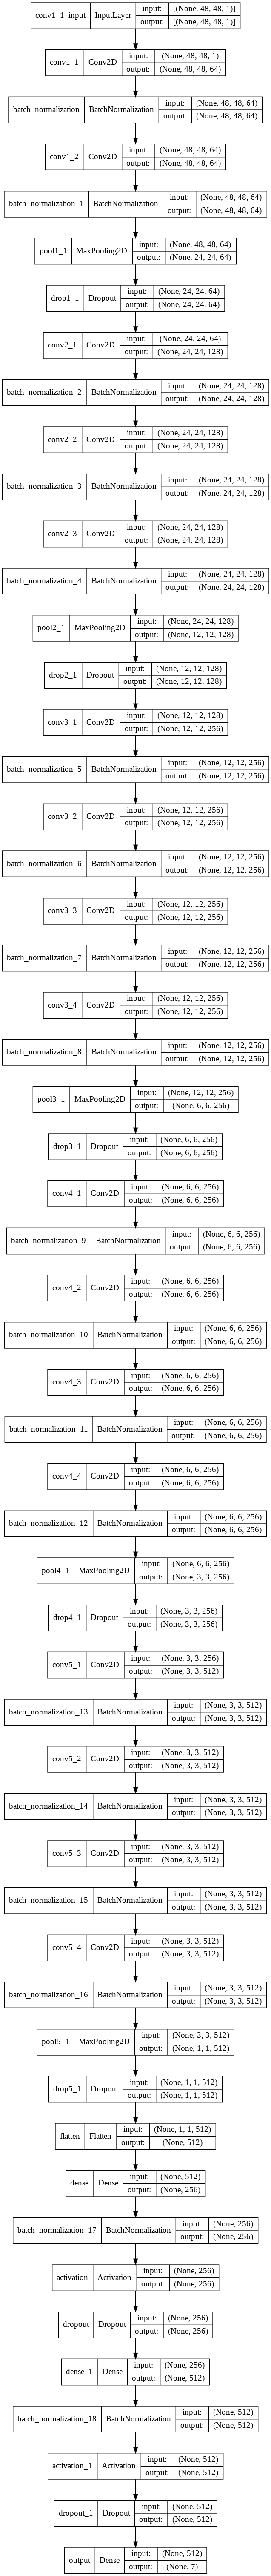

In [25]:
# save model details in png format
utils.plot_model(model, to_file='emotion-model.png', show_shapes=True, show_layer_names=True)

We define our CNN with the following global architecture:

17 convolutional layers

2 fully connected layers

Basic CNN architecture details:

Input layer - Input layer in CNN should contain image data
Convo layer - Convo layer is sometimes called feature extractor layer because features of the image are get extracted within this layer
Pooling layer - Pooling is used to reduce the dimensionality of each features while retaining the most important information. It is used between two convolution layer
Fully CL - Fully connected layer involves weights, biases, and neurons. It connects neurons in one layer to neurons in another layer. It is used to classify images between different category by training and placed before the output layer
Output Layer - Output layer contains the label which is in the form of one-hot encoded
Also we use some common techniques for each layer

Batch normalization: improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.

##<b> Train the model

Now it’s time to train the model and evaluate the results.

In [26]:
# defining steps per epochs 
epochs=100
steps_per_epoch=train_data.n//train_data.batch_size
print("Training steps per epochs",steps_per_epoch)

validation_steps=validation_data.n//validation_data.batch_size
print("Validation steps per epochs",validation_steps)

Training steps per epochs 900
Validation steps per epochs 220


In [27]:
"""
I used three callbacks 
one is `early stopping` for avoiding overfitting training data
2nd is 'checkpoint' to save model weights and 
other `ReduceLROnPlateau` for reducing learning rate.
"""

#this decreases the learning rate if the model loss does not decrease 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001, mode='auto')

# to save model weights 
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

# for avoiding overfitting training data
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)

callbacks = [checkpoint, reduce_lr, early_stopping]

In [ ]:
# fitting the model
history = model.fit(
    x=train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_data,
    validation_steps = validation_steps,
    callbacks=callbacks,
    verbose=1)

#<b> Note:- I train my model in kaggle and save model information 

At each epoch, Keras checks if our model performed better than during the previous epochs. If it is the case, the new best model weights are saved into a file. This will allow us to load directly the weights of our model without having to re-train it if we want to use it.

We also save the structure of our CNN (layers etc.) into a file:

#<b> Loading trained model all information and validation predictions

In [28]:
#loading the model
model_emo = load_model('/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/model details/CNN_Model_emotion.h5')

In [36]:
# model learning history
history_df = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/model details/history2.csv")

In [34]:
# predictions of validation set
predictions=np.load("/content/drive/MyDrive/ALMABETTER PROJECT/Face expression recognition/model details/predictions2.npy")

#<b> Analyze the results

In [37]:
 # Accuracy Score of Our Model
accuracy=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=validation_data.classes)
print(accuracy) 

0.662751202943674


Our best model managed to obtain a validation accuracy of approximately 66%, which is quite good given the fact that our target class has 7 possible values!

In [39]:
# history data frame
history_df.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,lr
0,0,2.149225,0.255271,1.905661,0.316477,0.0007
1,1,1.554960,0.400570,1.477657,0.442187,0.0007
2,2,1.351877,0.475737,1.371299,0.475426,0.0007
3,3,1.260082,0.518427,1.219631,0.522301,0.0007
4,4,1.202236,0.543055,1.228395,0.518466,0.0007


We got outputs at each step of the training phase. All those outputs were saved into the 'history' variable. We can use it to plot the evolution of the loss and accuracy on both the train and validation datasets:

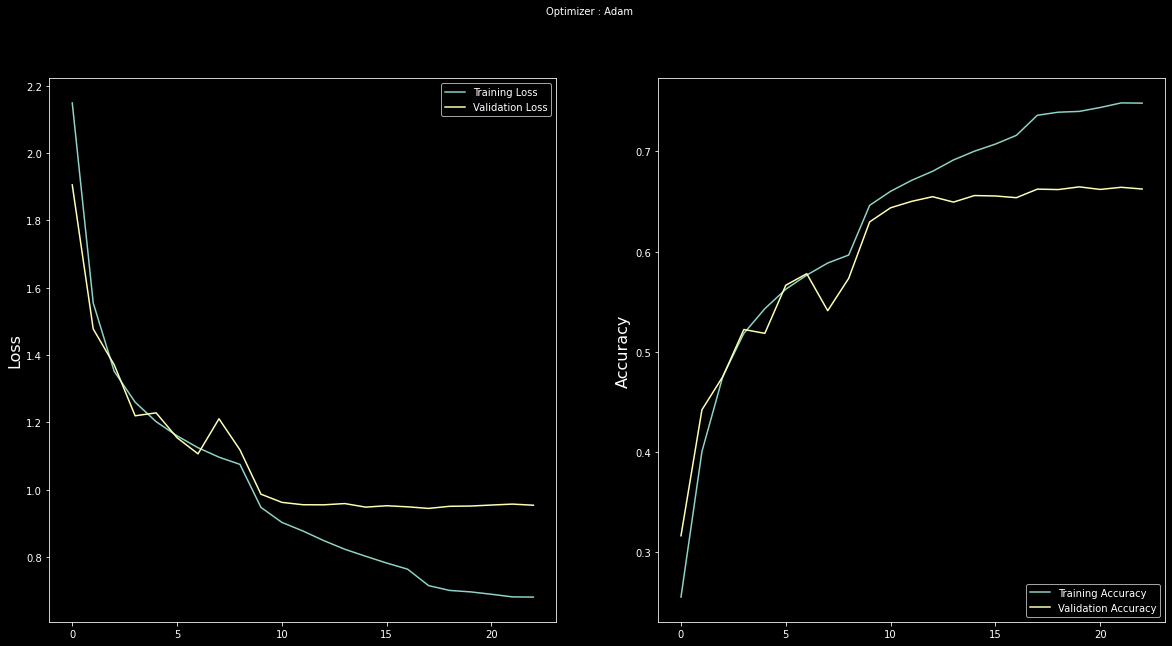

In [40]:
# plot the evolution of Loss and Acuracy on the train and validation sets
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


The validation accuracy starts to stabilize at the end of the 50 epochs between 62% and 66% accuracy.

The training loss is slightly higher than the validation loss for the first epochs which can be surprising. Indeed we are more used to see higher validation losses than training losses in machine learning. Here this is simply due to the presence of dropout, which is only applied during the training phase and not during the validation phase.

We can see that the training loss is becoming much smaller than the validation loss after the 7th-8thth epochs. This means that our model starts to overfit our training dataset after too much iterations. That is why the validation loss does not decrease a lot after. One solution consists in early-stopping the training of the model.

We could also use some different dropout values and performing data augmentation. Those methods were tested on this dataset, but they did not significantly increase the validation accuracy although they reduced the overfitting effect. Using them slightly increased the training duration of the model.

Finally we can plot the confusion matrix in order to see how our model classified the images:

<Figure size 432x288 with 0 Axes>

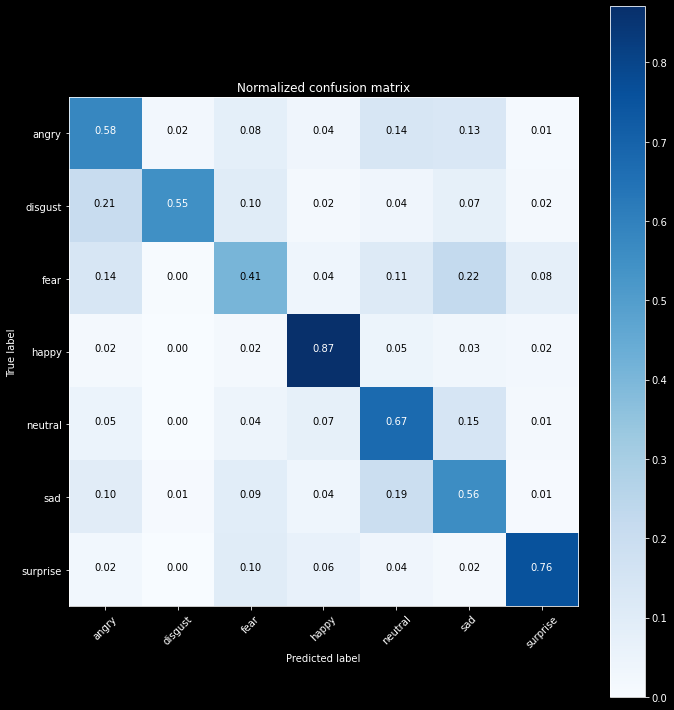

In [41]:
# show the confusion matrix of our predictions

# compute predictions

y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_data.classes
class_names = validation_data.class_indices.keys()


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces maybe because it confuses them with sad faces.

#<b>Conclusion
* Our model is giving an accuracy of 66% on 

* validation set and is robust in that it works well even in a dim light environment.

* The application is able to detect face location and predict the right expression while checking it on a local webcam.

* The front-end of the model was made using streamlit for webapp and running well on local webapp link.

* Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit share that runs on a web server.

* And I believe that through this model teachers can understand the students' perception during online classes and change the way of teaching if needed by understanding the students’ motive.